# US Politics This Week Ad Analysis

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
#CONSTANTS
TEST_DATA_FILE = 'test_data.csv'
VIEWER_DATA_FILE = 'viewer_data.csv'
VIEWER_ID = 'viewer_id'
SAW_LOCAL_AD = 'test'
WATCHED_POLITICS = 'watched'

# 1. Read Test dataset and display columns

In [39]:
viewer_data = pd.read_csv(VIEWER_DATA_FILE)
test_data = pd.read_csv(TEST_DATA_FILE)
print(len(test_data))
test_data.head()

418026


,viewer_id,date,tv_make,tv_size,uhd_capable,tv_provider,total_time_watched,watched,test
0,24726768,2018-01-16,Sony,70,0,Comcast,10.75,0,1
1,25001464,2018-01-18,Sony,32,0,NaN,2.75,0,0
2,28291998,2018-01-18,Sony,50,1,Dish Network,20.00,0,0
3,17057157,2018-01-19,Sony,32,0,Comcast,1.50,0,0
4,29504447,2018-01-17,Sony,32,0,Comcast,17.50,0,0


In [ ]:
sns.pairplot(test_data[['tv_make', 'tv_size', 'uhd_capable', 'tv_provider', 'total_time_watched', 'watched', 'test']])

# 2. Check if Viewers who saw ads with local Mayors watched US Politics This Week less

First I am going to check for duplicate and NaN values. There are 6 duplicate user IDs but they had those users were subjected to the same test groups with their watch value unaffected. Therefore, I am going to only retain one entry per user for those users. There are many rows without tv_provider data or viewer data as well which I will drop.

In [35]:
print(f'Number of duplicate IDs: {len(test_data) -test_data[VIEWER_ID].nunique()}')
[print(col,test_data[col].isnull().sum()) for col in test_data.columns]

Number of duplicate IDs: 0
viewer_id 0
date 0
tv_make 0
tv_size 0
uhd_capable 0
tv_provider 52718
total_time_watched 0
watched 0
test 0
gender 556
age 556
city 556


[None, None, None, None, None, None, None, None, None, None, None, None]

In [41]:
print(test_data[test_data.duplicated(subset=[VIEWER_ID],keep=False)][[VIEWER_ID,'watched','test']].sort_values(by=VIEWER_ID))

        viewer_id  watched  test
192975     337110        0     1
254424     337110        0     1
37198      353136        0     0
132589     353136        0     0
22603      393446        0     1
170071     393446        0     1
36143      567482        1     0
96757      567482        1     0
38343     1112405        0     0
93683     1112405        0     0
161327    1152006        0     0
295694    1152006        0     0


In [42]:
test_data = test_data.drop_duplicates(subset = [VIEWER_ID])

Now I am going to merge in the viewer data and insure we do not lose many entries during this process, which we don't.

In [43]:
print(len(test_data))
test_data = pd.merge(test_data, viewer_data, how='left', on = VIEWER_ID )
print(len(test_data))

418020
418020


Now I am going to create a function to check what percentage of viewers which percentage watch the show. I will also create a function to split an input data frame into two based on var being 0 or 1. 

In [47]:
def check_ad_effect(df,dfname):
    percent_watched = 100*len(df.loc[df[WATCHED_POLITICS]==1])/len(df)
    percent_not_watched = 100*len(df.loc[df[WATCHED_POLITICS]==0])/len(df)
    print(f'{dfname} Watched: {percent_watched} Did Not Watch: {percent_not_watched}')
def split_df(df, var):
    df1 = df.loc[df[var]==1]
    df2 = df.loc[df[var]==0]
    return df1, df2
    

In [48]:
saw_local_ad, no_ad = split_df(test_data, SAW_LOCAL_AD)
check_ad_effect(saw_local_ad, 'saw local ad')
check_ad_effect(no_ad, 'no local ad')



saw local ad Watched: 4.578000734124556 Did Not Watch: 95.42199926587544
no local ad Watched: 6.292613304008049 Did Not Watch: 93.70738669599196


So, viewers that saw the local ad watched US Politics This Week ~1.73% less than viewers who did not see the ad. This is not expected, but may be due to the samples not being stratified across users by age, gender, tv_size, etc evenly. So, let's check!

# Why less viewers that saw Local Ad watched US Politics This Week

I am going to drop NaN rows so we can actually compare information.

In [49]:
no_nans = test_data.dropna()

['Boston' 'San Francisco' 'Philadelphia' 'Detroit' 'Minneapolis' 'Atlanta'
 'Chicago' 'Los Angeles' 'Dallas' 'Miami' 'New York' 'Phoenix' 'Seattle'
 'Tampa' 'Houston']


Also, I am going to use a function to compare variable distributions.

In [50]:
def make_bar_plots(df1, df2, df1name, df2name):
    for col in df1.columns:
        figure = plt.figure()
        local_ad_ndarray = plt.hist(df1[col],  label = df1name, density = True, alpha = 0.5)
        no_ad_ndarray = plt.hist(df2[col],  label = df2name, density = True, alpha = 0.5)
        plt.xticks(rotation='vertical')
        plt.title(col)
        plt.legend()

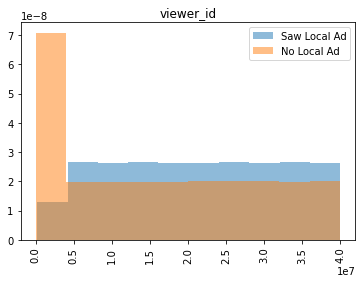

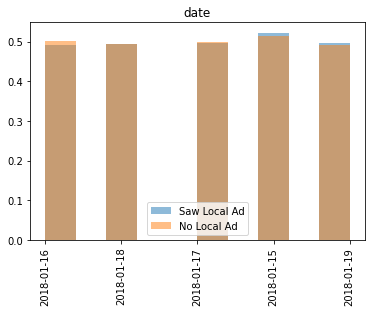

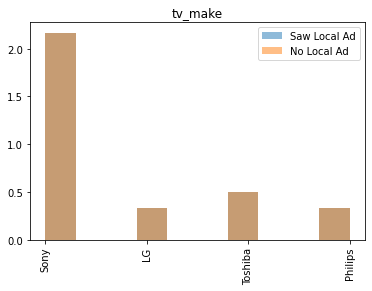

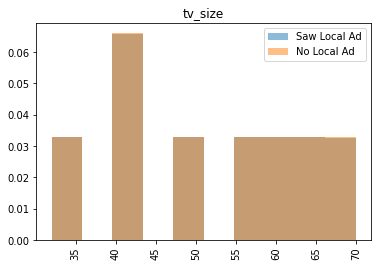

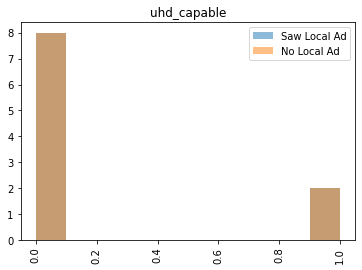

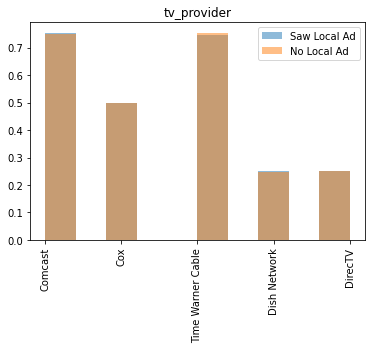

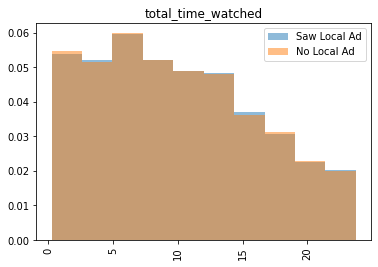

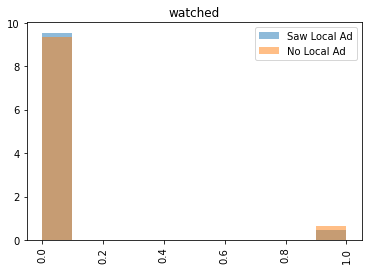

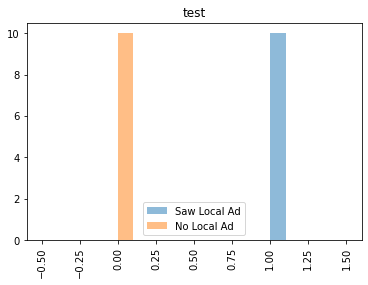

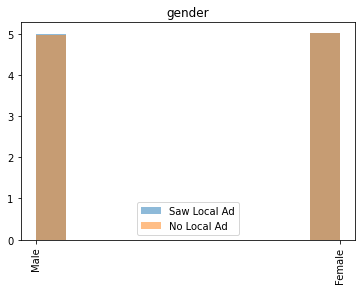

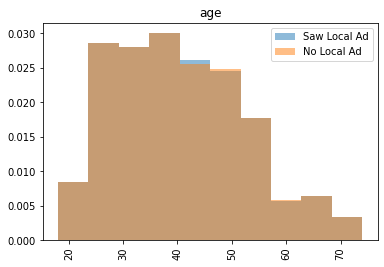

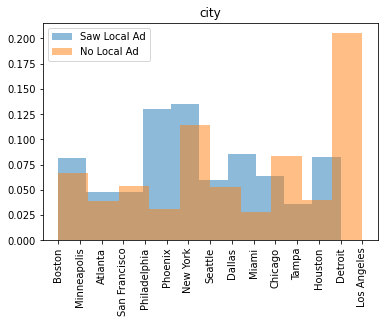

In [51]:
saw_ad, no_ad = split_df(no_nans, SAW_LOCAL_AD)
make_bar_plots(saw_ad, no_ad, 'Saw Local Ad', 'No Local Ad')


These plots show some difference in variable distributions, but are largely similar, except the city distribution!

In [52]:
print(saw_ad['city'].unique())
print(no_ad['city'].unique())

['Boston' 'Minneapolis' 'Atlanta' 'San Francisco' 'Philadelphia' 'Phoenix'
 'New York' 'Seattle' 'Dallas' 'Miami' 'Chicago' 'Tampa' 'Houston'
 'Detroit']
['San Francisco' 'Philadelphia' 'Detroit' 'Chicago' 'Minneapolis'
 'Los Angeles' 'Dallas' 'Miami' 'New York' 'Tampa' 'Houston' 'Atlanta'
 'Boston' 'Phoenix' 'Seattle']


In [32]:
#no_la = no_nans.loc[no_nans['city'] != 'Los Angeles']

check_ad_effect(saw_local_ad, 'saw local ad')
check_ad_effect(no_ad, 'no local ad')

saw local ad length: 204325 ---------
number watched: 9354
number did not watch:194971
saw local ad Watched: 4.578000734124556 Did Not Watch: 95.42199926587544
no local ad length: 140296 ---------
number watched: 7017
number did not watch:133279
no local ad Watched: 5.001568113132235 Did Not Watch: 94.99843188686776


In [34]:
cities = no_nans['city'].unique()
print(cities)
for city in cities:
    print(f'{city}-------------')
    thiscity = no_nans.loc[no_nans['city']==city]
    saw_ad, no_ad = split_df(thiscity, SAW_LOCAL_AD)
    check_ad_effect(saw_local_ad, 'saw local ad')
    check_ad_effect(no_ad, 'no local ad')

['Boston' 'San Francisco' 'Philadelphia' 'Detroit' 'Minneapolis' 'Atlanta'
 'Chicago' 'Los Angeles' 'Dallas' 'Miami' 'New York' 'Phoenix' 'Seattle'
 'Tampa' 'Houston']
Boston-------------
saw local ad Watched: 4.578000734124556 Did Not Watch: 95.42199926587544
no local ad Watched: 5.233517817263812 Did Not Watch: 94.76648218273618
San Francisco-------------
saw local ad Watched: 4.578000734124556 Did Not Watch: 95.42199926587544
no local ad Watched: 4.9887288052533565 Did Not Watch: 95.01127119474664
Philadelphia-------------
saw local ad Watched: 4.578000734124556 Did Not Watch: 95.42199926587544
no local ad Watched: 2.5268817204301075 Did Not Watch: 97.47311827956989
Detroit-------------
saw local ad Watched: 4.578000734124556 Did Not Watch: 95.42199926587544
no local ad Watched: 4.501903136894605 Did Not Watch: 95.49809686310539
Minneapolis-------------
saw local ad Watched: 4.578000734124556 Did Not Watch: 95.42199926587544
no local ad Watched: 5.320485965647256 Did Not Watch: 94.6